In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import tensorflow as tf

In [74]:
IMG_SIZE = 299
BATCH_SIZE = 16

In [75]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Oral Cancer Dataset",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
)

Found 485 files belonging to 2 classes.
Using 388 files for training.


In [76]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Oral Cancer Dataset",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

Found 485 files belonging to 2 classes.
Using 97 files for validation.


In [77]:
class_names = train_ds.class_names

In [78]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)

In [79]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models

In [88]:
base_model = InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(299, 299, 3)
)

base_model.trainable = False  # freeze weights

In [89]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [90]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,065,185 (84.17 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [91]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [92]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 822ms/step - accuracy: 0.4901 - loss: 15.6700 - val_accuracy: 0.7010 - val_loss: 3.4718
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - accuracy: 0.6441 - loss: 5.3496 - val_accuracy: 0.7010 - val_loss: 1.5312
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 211ms/step - accuracy: 0.7111 - loss: 1.1254 - val_accuracy: 0.7113 - val_loss: 0.6458
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.7363 - loss: 0.6158 - val_accuracy: 0.7320 - val_loss: 0.5315
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - accuracy: 0.7653 - loss: 0.4871 - val_accuracy: 0.7320 - val_loss: 0.5330
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.7561 - loss: 0.4896 - val_accuracy: 0.7216 - val_loss: 0.5718
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - accuracy: 0.7330 - loss: 0.5046 - val_accuracy: 0.7320 - val_loss: 0.5083
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 0.7262 - loss: 0.5205 - val_accuracy: 

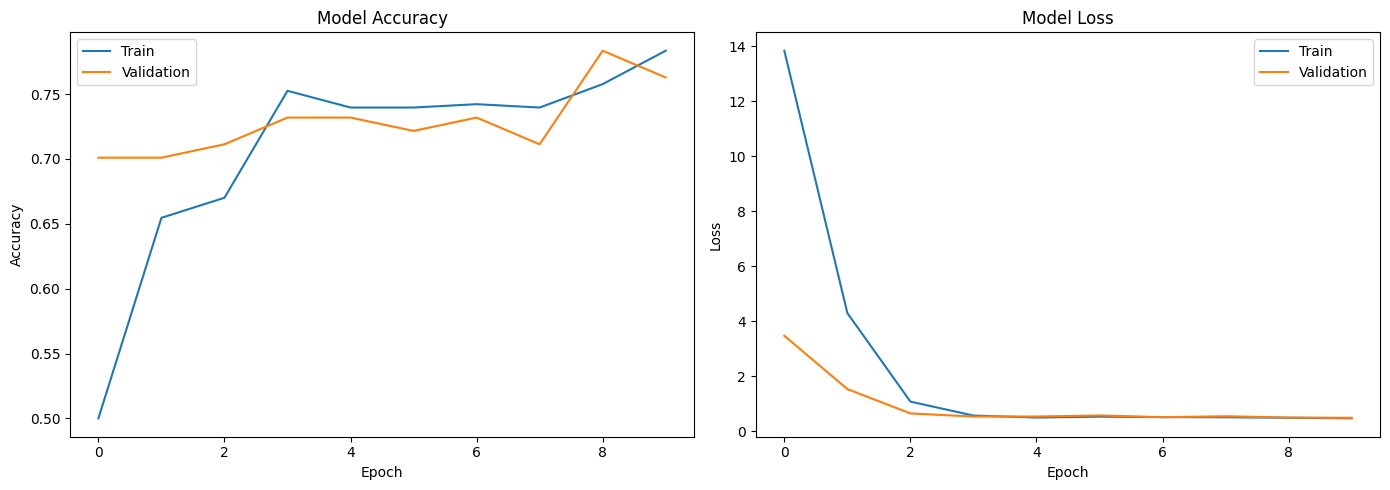

In [93]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title("Model Accuracy")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Accuracy")
ax[0].legend(["Train", "Validation"])

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title("Model Loss")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")
ax[1].legend(["Train", "Validation"])

plt.tight_layout()
plt.show()

In [94]:
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_pred.extend((preds > 0.5).astype("int32"))
    y_true.extend(labels.numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=["Cancer", "Non Cancer"]))

              precision    recall  f1-score   support

      Cancer       0.74      0.79      0.76        47
  Non Cancer       0.79      0.74      0.76        50

    accuracy                           0.76        97
   macro avg       0.76      0.76      0.76        97
weighted avg       0.76      0.76      0.76        97



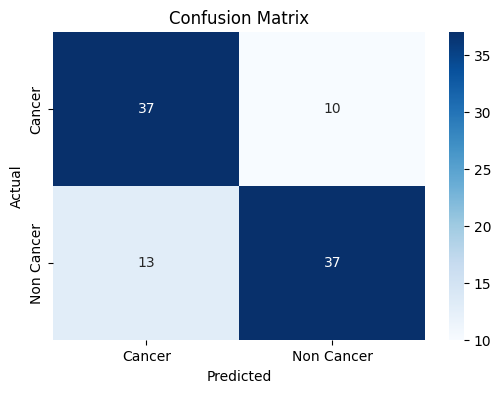

In [96]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Cancer", "Non Cancer"],
            yticklabels=["Cancer", "Non Cancer"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()